## boo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import matplotlib.cm as cm
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("cirrhosis.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


In [ ]:
df.head(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,1.0,21464,1,1.0,1.0,1.0,1,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,1.0,20617,1,0.0,1.0,1.0,0,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,1.0,25594,0,0.0,0.0,0.0,1,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,1.0,19994,1,0.0,1.0,1.0,1,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,0.0,13918,1,0.0,1.0,1.0,0,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,2503,0.0,24201,1,0.0,1.0,0.0,0,0.8,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,1832,0.0,20284,1,0.0,1.0,0.0,0,1.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,2466,0.0,19379,1,0.0,0.0,0.0,0,0.3,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,2400,1.0,15526,1,0.0,0.0,1.0,0,3.2,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,51,0.0,25772,1,1.0,0.0,1.0,1,12.6,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [ ]:
df.tail(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
408,1067,NaN,15706,1,NaN,NaN,NaN,0,0.7,3.73,NaN,NaN,NaN,NaN,214.0,10.8,3.0
409,1072,NaN,14245,1,NaN,NaN,NaN,0,1.5,3.81,NaN,NaN,NaN,NaN,255.0,10.8,3.0
410,1119,NaN,18628,1,NaN,NaN,NaN,0,0.6,3.57,NaN,NaN,NaN,NaN,286.0,10.6,3.0
411,1097,NaN,24472,1,NaN,NaN,NaN,0,1.0,3.58,NaN,NaN,NaN,NaN,244.0,10.8,3.0
412,989,NaN,12784,1,NaN,NaN,NaN,0,0.7,3.23,NaN,NaN,NaN,NaN,312.0,10.8,3.0
413,681,NaN,24472,1,NaN,NaN,NaN,0,1.2,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,NaN,14245,1,NaN,NaN,NaN,0,0.9,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,NaN,20819,1,NaN,NaN,NaN,0,1.6,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,NaN,21185,1,NaN,NaN,NaN,0,0.8,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,976,NaN,19358,1,NaN,NaN,NaN,0,0.7,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.shape

(418, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


In [ ]:
df.describe()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,312.000000,418.000000,418.000000,312.000000,312.000000,312.000000,418.000000,418.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,0.506410,18533.351675,0.894737,0.076923,0.512821,0.288462,0.153110,3.220813,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,0.500762,3815.845055,0.307260,0.266897,0.500639,0.453775,0.360525,4.407506,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,0.000000,15644.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,1.000000,18628.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.400000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,1.000000,21272.500000,1.000000,0.000000,1.000000,1.000000,0.000000,3.400000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,312.00,418.00,418.00,312.00,312.00,312.00,418.00,418.00,418.00,310.00,312.00,312.00,282.00,407.00,416.00,412.00
mean,1917.78,0.51,18533.35,0.89,0.08,0.51,0.29,0.15,3.22,3.50,97.65,1982.66,122.56,124.70,257.02,10.73,3.02
std,1104.67,0.50,3815.85,0.31,0.27,0.50,0.45,0.36,4.41,0.42,85.61,2140.39,56.70,65.15,98.33,1.02,0.88
min,41.00,0.00,9598.00,0.00,0.00,0.00,0.00,0.00,0.30,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1092.75,0.00,15644.50,1.00,0.00,0.00,0.00,0.00,0.80,3.24,41.25,871.50,80.60,84.25,188.50,10.00,2.00
50%,1730.00,1.00,18628.00,1.00,0.00,1.00,0.00,0.00,1.40,3.53,73.00,1259.00,114.70,108.00,251.00,10.60,3.00
75%,2613.50,1.00,21272.50,1.00,0.00,1.00,1.00,0.00,3.40,3.77,123.00,1980.00,151.90,151.00,318.00,11.10,4.00
max,4795.00,1.00,28650.00,1.00,1.00,1.00,1.00,1.00,28.00,4.64,588.00,13862.40,457.25,598.00,721.00,18.00,4.00


In [ ]:
df["Stage"].value_counts()

Stage
3.00    155
4.00    144
2.00     92
1.00     21
Name: count, dtype: int64

In [ ]:
np.random.seed()
df.sample(n=15)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
317,1680,NaN,15706,1,NaN,NaN,NaN,0,0.70,3.68,NaN,NaN,NaN,NaN,306.00,9.50,2.00
306,1149,0.00,11167,1,0.00,0.00,0.00,0,0.80,3.56,52.00,1282.00,130.00,59.00,344.00,10.50,2.00
27,549,0.00,16417,1,1.00,1.00,1.00,1,17.20,3.23,209.00,1975.00,189.10,195.00,144.00,13.00,4.00
86,198,1.00,13616,1,0.00,0.00,0.00,0,1.10,4.40,75.00,1860.00,218.55,72.00,447.00,10.70,3.00
392,193,NaN,18993,1,NaN,NaN,NaN,1,0.70,2.96,NaN,NaN,NaN,NaN,319.00,9.90,4.00
11,304,0.00,21600,1,0.00,0.00,1.00,0,3.60,3.52,94.00,591.00,82.15,95.00,71.00,13.60,4.00
229,1979,0.00,12641,1,0.00,1.00,1.00,0,3.30,3.41,51.00,310.00,83.70,44.00,95.00,11.50,4.00
289,1363,1.00,24101,1,0.00,0.00,0.00,0,1.40,3.57,33.00,722.00,93.00,69.00,283.00,9.80,3.00
226,999,1.00,21532,0,0.00,0.00,0.00,0,2.30,3.35,172.00,1601.00,179.80,63.00,394.00,9.70,2.00
328,1462,NaN,23011,1,NaN,NaN,NaN,0,0.70,3.40,NaN,NaN,NaN,NaN,371.00,10.10,4.00


In [ ]:
df[df.duplicated()].count()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
df.head(10)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,1.00,21464,1,1.00,1.00,1.00,1,14.50,2.60,156.00,1718.00,137.95,172.00,190.00,12.20,4.00
1,4500,1.00,20617,1,0.00,1.00,1.00,0,1.10,4.14,54.00,7394.80,113.52,88.00,221.00,10.60,3.00
2,1012,1.00,25594,0,0.00,0.00,0.00,1,1.40,3.48,210.00,516.00,96.10,55.00,151.00,12.00,4.00
3,1925,1.00,19994,1,0.00,1.00,1.00,1,1.80,2.54,64.00,6121.80,60.63,92.00,183.00,10.30,4.00
4,1504,0.00,13918,1,0.00,1.00,1.00,0,3.40,3.53,143.00,671.00,113.15,72.00,136.00,10.90,3.00
5,2503,0.00,24201,1,0.00,1.00,0.00,0,0.80,3.98,50.00,944.00,93.00,63.00,NaN,11.00,3.00
6,1832,0.00,20284,1,0.00,1.00,0.00,0,1.00,4.09,52.00,824.00,60.45,213.00,204.00,9.70,3.00
7,2466,0.00,19379,1,0.00,0.00,0.00,0,0.30,4.00,52.00,4651.20,28.38,189.00,373.00,11.00,3.00
8,2400,1.00,15526,1,0.00,0.00,1.00,0,3.20,3.08,79.00,2276.00,144.15,88.00,251.00,11.00,2.00
9,51,0.00,25772,1,1.00,0.00,1.00,1,12.60,2.74,140.00,918.00,147.25,143.00,302.00,11.50,4.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


In [ ]:
NaN = np.nan
df["NEW_COL"] = NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  NEW_COL        0 non-null      float64
dtypes: float64

In [ ]:
del df['NEW_COL']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


In [ ]:
df.isnull().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.mean()

N_Days           1917.78
Drug                0.51
Age             18533.35
Sex                 0.89
Ascites             0.08
Hepatomegaly        0.51
Spiders             0.29
Edema               0.15
Bilirubin           3.22
Albumin             3.50
Copper             97.65
Alk_Phos         1982.66
SGOT              122.56
Tryglicerides     124.70
Platelets         257.02
Prothrombin        10.73
Stage               3.02
dtype: float64

In [ ]:
df.median()

N_Days           1730.00
Drug                1.00
Age             18628.00
Sex                 1.00
Ascites             0.00
Hepatomegaly        1.00
Spiders             0.00
Edema               0.00
Bilirubin           1.40
Albumin             3.53
Copper             73.00
Alk_Phos         1259.00
SGOT              114.70
Tryglicerides     108.00
Platelets         251.00
Prothrombin        10.60
Stage               3.00
dtype: float64

In [ ]:
df.mode()

,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0.70,3.35,52.00,559.00,71.30,118.00,344.00,10.60
1,NaN,NaN,NaN,601.00,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,663.00,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,674.00,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,794.00,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,815.00,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,944.00,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1009.00,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,1052.00,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1282.00,NaN,NaN,NaN,NaN


In [ ]:
df.quantile(.25)

N_Days           1092.75
Drug                0.00
Age             15644.50
Sex                 1.00
Ascites             0.00
Hepatomegaly        0.00
Spiders             0.00
Edema               0.00
Bilirubin           0.80
Albumin             3.24
Copper             41.25
Alk_Phos          871.50
SGOT               80.60
Tryglicerides      84.25
Platelets         188.50
Prothrombin        10.00
Stage               2.00
Name: 0.25, dtype: float64

In [ ]:
df.quantile(.50)

N_Days           1730.00
Drug                1.00
Age             18628.00
Sex                 1.00
Ascites             0.00
Hepatomegaly        1.00
Spiders             0.00
Edema               0.00
Bilirubin           1.40
Albumin             3.53
Copper             73.00
Alk_Phos         1259.00
SGOT              114.70
Tryglicerides     108.00
Platelets         251.00
Prothrombin        10.60
Stage               3.00
Name: 0.5, dtype: float64

In [ ]:
df.quantile(.75)

N_Days           2613.50
Drug                1.00
Age             21272.50
Sex                 1.00
Ascites             0.00
Hepatomegaly        1.00
Spiders             1.00
Edema               0.00
Bilirubin           3.40
Albumin             3.77
Copper            123.00
Alk_Phos         1980.00
SGOT              151.90
Tryglicerides     151.00
Platelets         318.00
Prothrombin        11.10
Stage               4.00
Name: 0.75, dtype: float64

In [ ]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3-Q1

In [ ]:
max=df.max

In [ ]:
min=df.min

In [ ]:
df.max()-df.min()

N_Days           4754.00
Drug                1.00
Age             19052.00
Sex                 1.00
Ascites             1.00
Hepatomegaly        1.00
Spiders             1.00
Edema               1.00
Bilirubin          27.70
Albumin             2.68
Copper            584.00
Alk_Phos        13573.40
SGOT              430.90
Tryglicerides     565.00
Platelets         659.00
Prothrombin         9.00
Stage               3.00
dtype: float64

In [ ]:
df.var()

N_Days           1220302.42
Drug                   0.25
Age             14560673.48
Sex                    0.09
Ascites                0.07
Hepatomegaly           0.25
Spiders                0.21
Edema                  0.13
Bilirubin             19.43
Albumin                0.18
Copper              7329.74
Alk_Phos         4581264.32
SGOT                3214.84
Tryglicerides       4244.35
Platelets           9667.92
Prothrombin            1.04
Stage                  0.78
dtype: float64

In [ ]:
df.std()

N_Days          1104.67
Drug               0.50
Age             3815.85
Sex                0.31
Ascites            0.27
Hepatomegaly       0.50
Spiders            0.45
Edema              0.36
Bilirubin          4.41
Albumin            0.42
Copper            85.61
Alk_Phos        2140.39
SGOT              56.70
Tryglicerides     65.15
Platelets         98.33
Prothrombin        1.02
Stage              0.88
dtype: float64

In [ ]:
df.groupby(["Stage"])["Age"].median().sort_values(ascending=False)

Stage
4.00   19724.00
3.00   17947.00
2.00   17897.00
1.00   16929.00
Name: Age, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


In [ ]:
df.corr()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.00,0.01,-0.13,0.01,-0.31,-0.29,-0.27,-0.27,-0.40,0.43,-0.36,0.15,-0.23,-0.15,0.15,-0.11,-0.37
Drug,0.01,1.00,0.13,-0.06,0.04,-0.10,-0.01,0.02,-0.09,-0.01,-0.00,0.02,-0.04,-0.01,-0.03,-0.07,-0.07
Age,-0.13,0.13,1.00,-0.16,0.23,0.08,-0.05,0.20,0.00,-0.18,0.06,-0.05,-0.15,0.02,-0.15,0.11,0.19
Sex,0.01,-0.06,-0.16,1.00,-0.01,-0.05,0.14,-0.03,0.03,-0.03,-0.24,-0.03,0.00,-0.05,0.09,-0.07,-0.02
Ascites,-0.31,0.04,0.23,-0.01,1.00,0.16,0.16,0.47,0.38,-0.39,0.23,0.01,0.09,0.21,-0.22,0.32,0.25
Hepatomegaly,-0.29,-0.10,0.08,-0.05,0.16,1.00,0.30,0.17,0.30,-0.30,0.23,0.11,0.14,0.16,-0.19,0.19,0.47
Spiders,-0.27,-0.01,-0.05,0.14,0.16,0.30,1.00,0.25,0.29,-0.23,0.26,0.04,0.13,0.10,-0.16,0.25,0.29
Edema,-0.27,0.02,0.20,-0.03,0.47,0.17,0.25,1.00,0.28,-0.28,0.22,0.03,0.11,0.12,-0.19,0.29,0.23
Bilirubin,-0.40,-0.09,0.00,0.03,0.38,0.30,0.29,0.28,1.00,-0.31,0.46,0.12,0.44,0.44,-0.01,0.31,0.20
Albumin,0.43,-0.01,-0.18,-0.03,-0.39,-0.30,-0.23,-0.28,-0.31,1.00,-0.26,-0.10,-0.22,-0.10,0.16,-0.20,-0.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


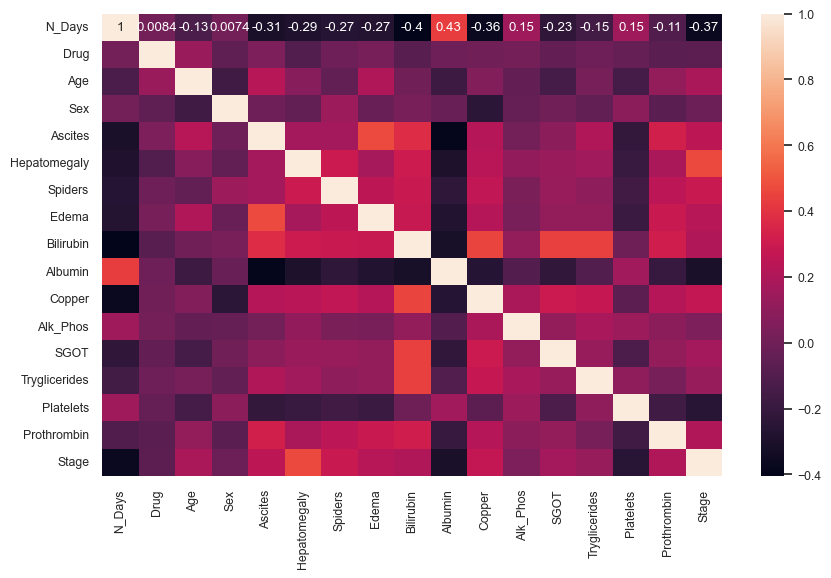

In [ ]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True);

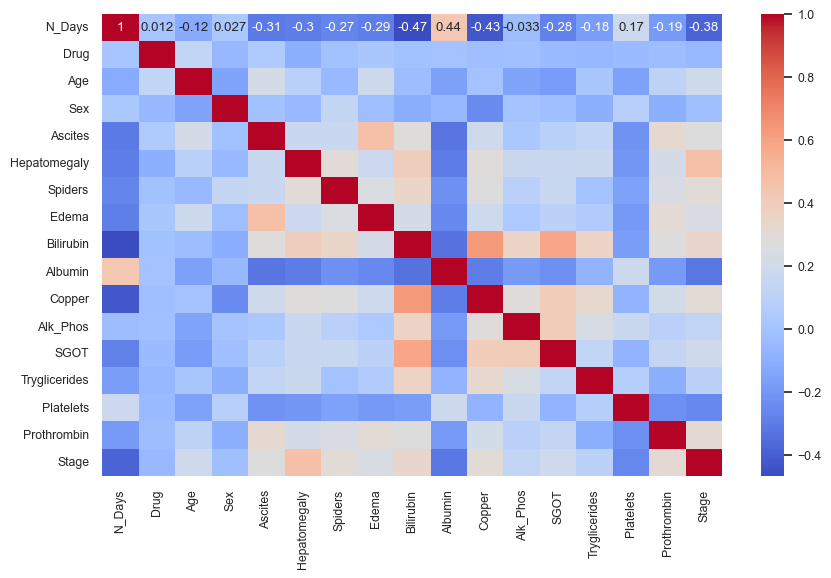

In [ ]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="coolwarm"); # nonparametric correlation

In [ ]:
from phik.report import plot_correlation_matrix
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


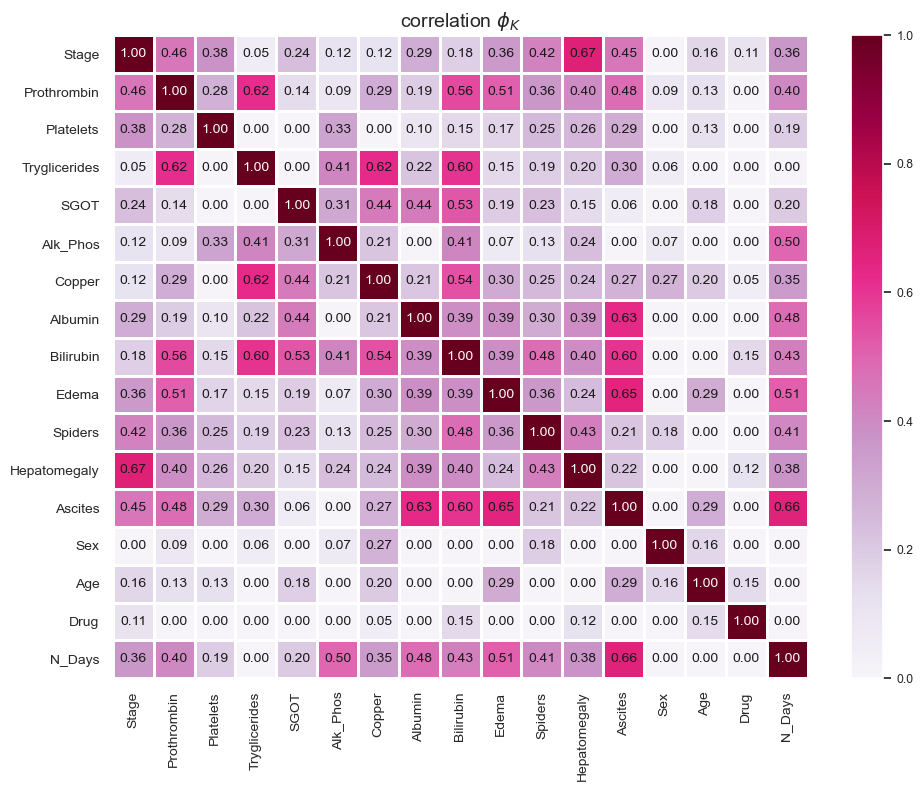

In [ ]:
# Presenting Phi K data as a heatmap with heading (credit: Jai Gupta, Stanford SPCS 2023)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="PuRd", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

In [ ]:
df2=df[['Bilirubin', 'Copper', 'SGOT', 'Tryglicerides', 'Prothrombin']]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      418 non-null    float64
 1   Copper         310 non-null    float64
 2   SGOT           312 non-null    float64
 3   Tryglicerides  282 non-null    float64
 4   Prothrombin    416 non-null    float64
dtypes: float64(5)
memory usage: 16.5 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      418 non-null    float64
 1   Albumin        418 non-null    float64
 2   Copper         310 non-null    float64
 3   Alk_Phos       312 non-null    float64
 4   SGOT           312 non-null    float64
 5   Tryglicerides  282 non-null    float64
 6   Platelets      407 non-null    float64
 7   Prothrombin    416 non-null    float64
dtypes: float64(8)
memory usage: 26.3 KB


interval columns not set, guessing: ['Bilirubin', 'Copper', 'SGOT', 'Tryglicerides', 'Prothrombin']


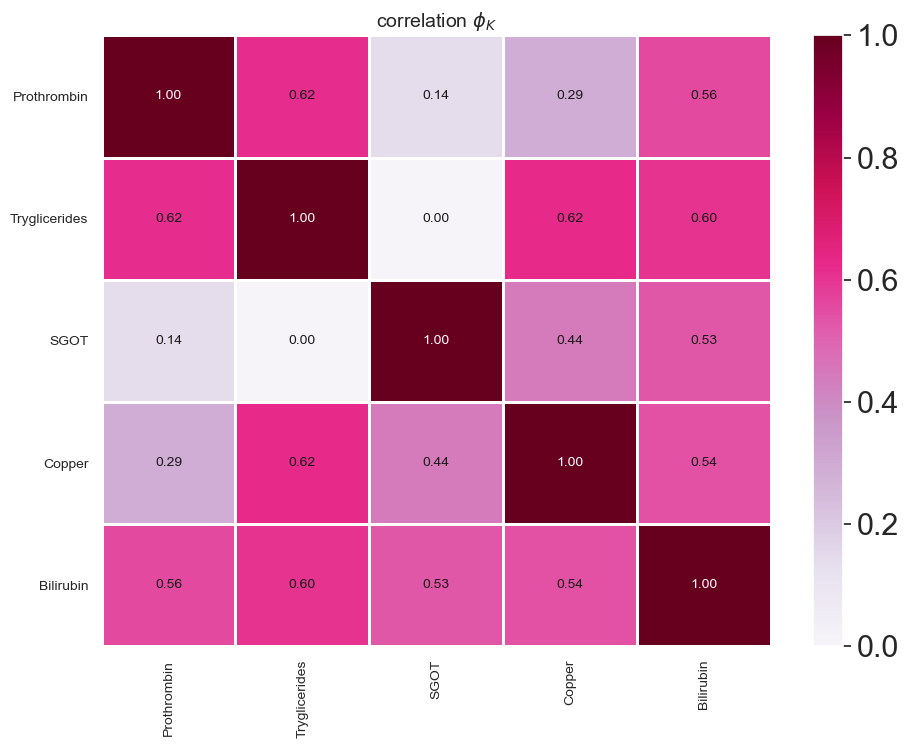

In [ ]:
from phik.report import plot_correlation_matrix
phik_overview = df2.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="PuRd", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

(array([ 21.,   0.,   0.,  92.,   0.,   0., 155.,   0.,   0., 144.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

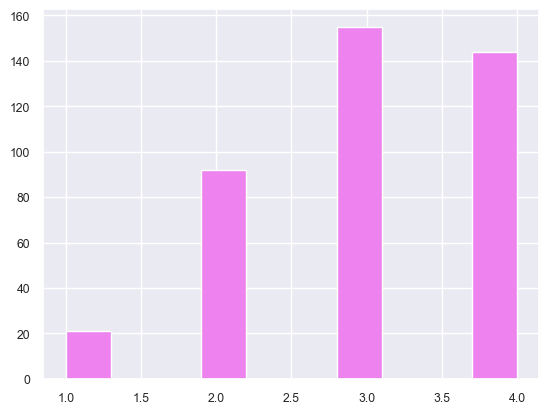

In [ ]:
plt.hist(df['Stage'], color='violet')

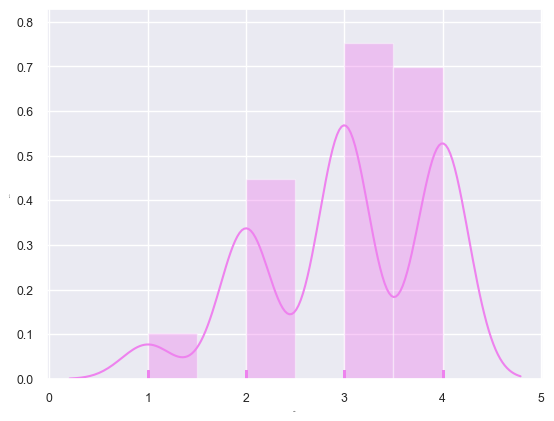

In [ ]:
sns.distplot(df['Stage'], color='violet', rug=True);

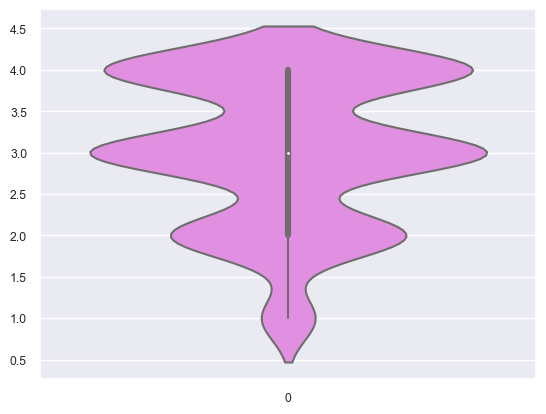

In [ ]:
sns.violinplot(df['Stage'],color='violet');

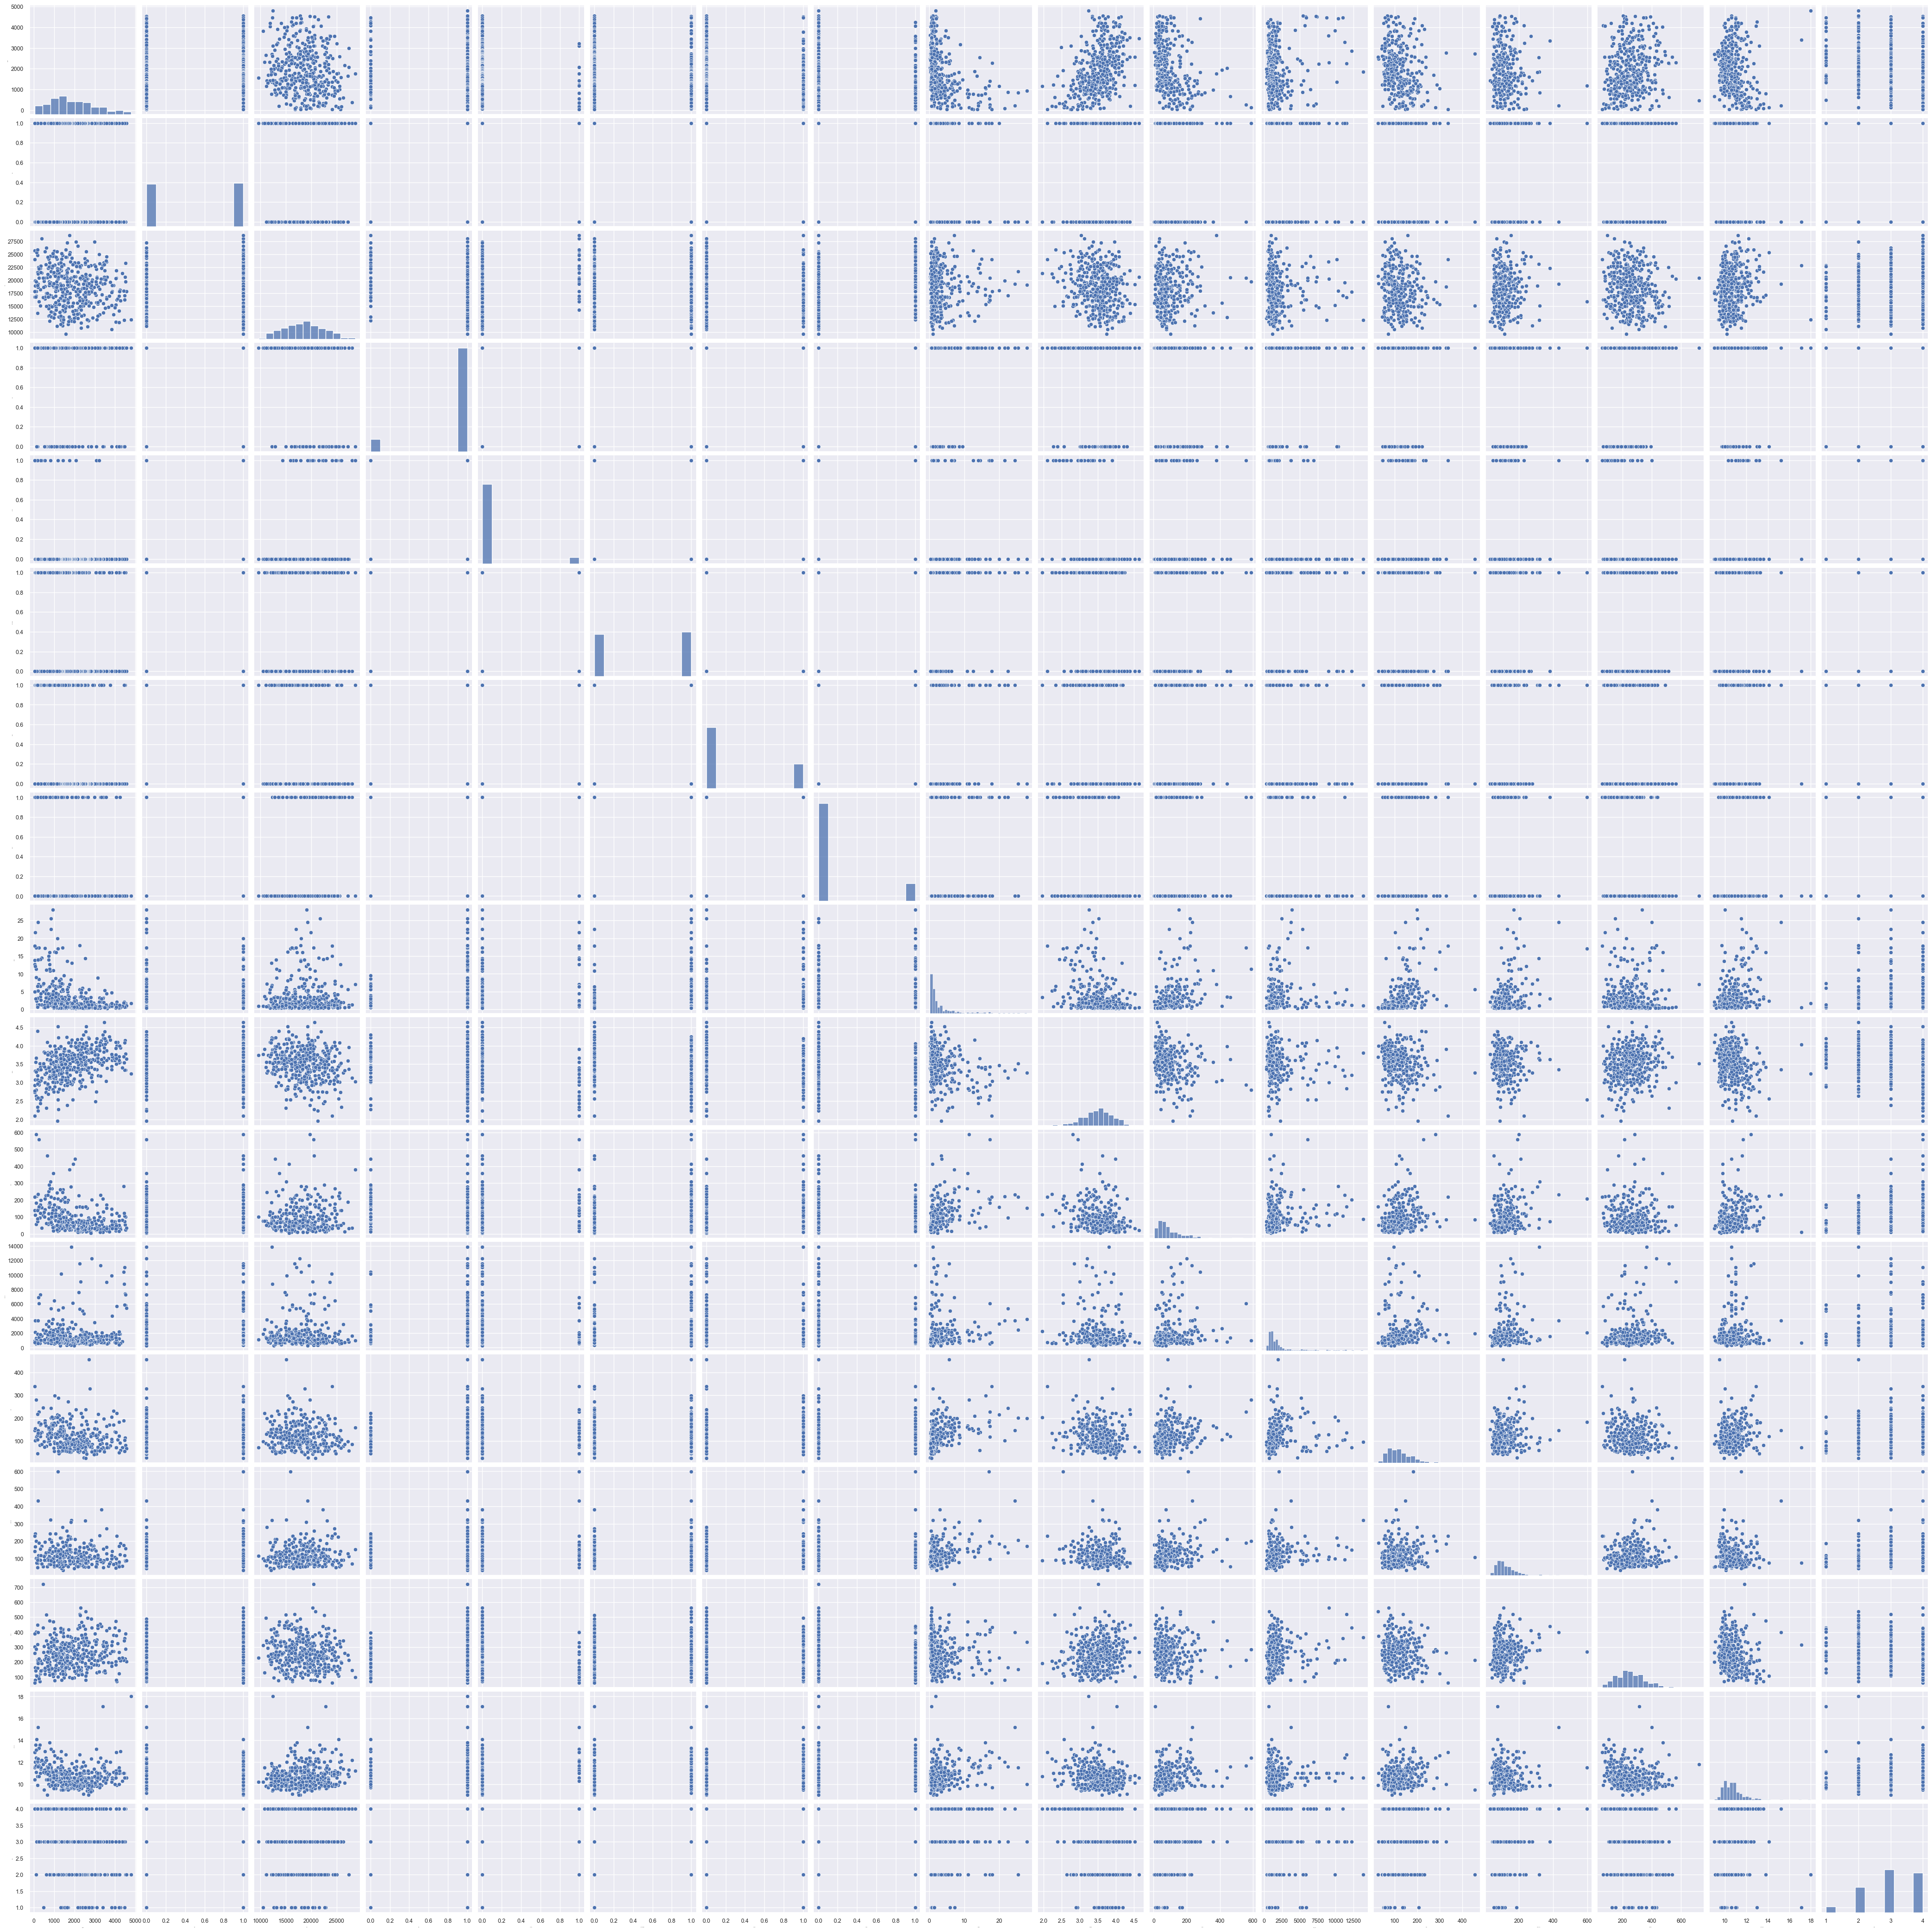

In [ ]:
sns.pairplot(df);

plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Stage', y='Hepatomegaly', jitter=True);

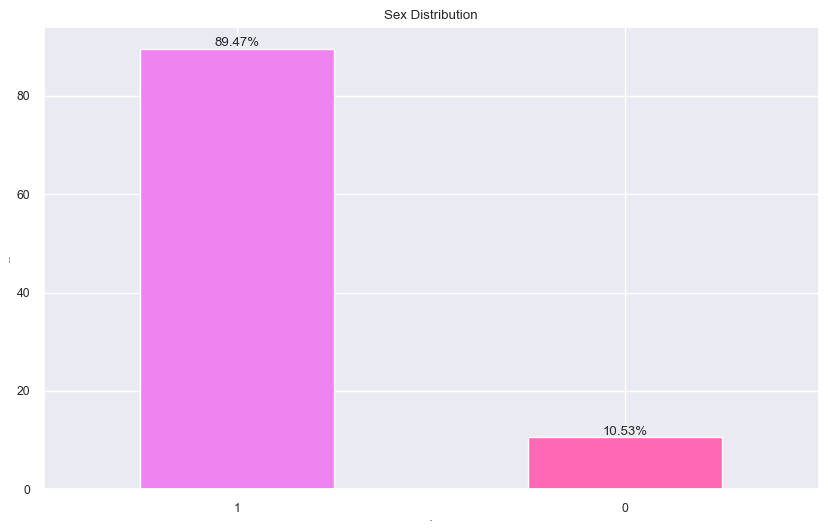

In [ ]:
# Aggregate the data
Outcome_counts = df['Sex'].value_counts()

# Calculate the percentages
total = Outcome_counts.sum()
Outcome_percentages = (Outcome_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = Outcome_percentages.plot(kind='bar', color=['violet', 'hotpink'])
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Sex Distribution')

# Add percentages on top of the bars
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 0),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xticks(rotation=0) # change to 90 this line of code if you want the x-axis to appear horizontal
plt.show()

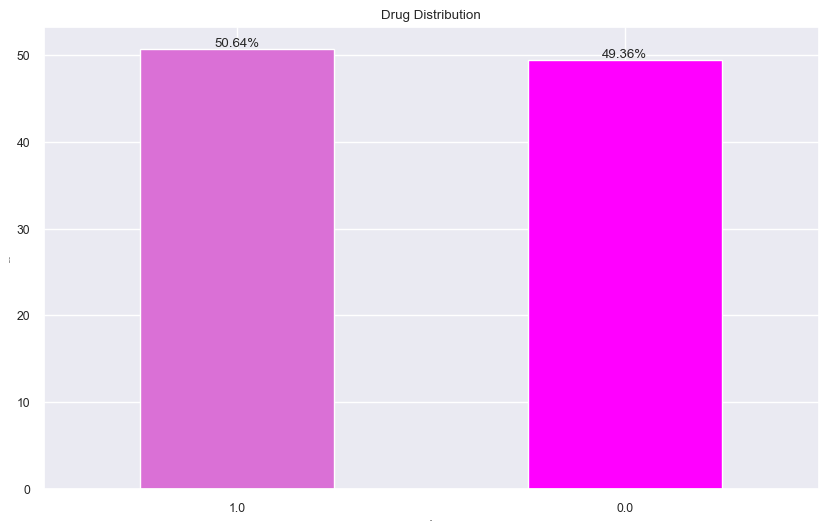

In [ ]:
# Aggregate the data
Outcome_counts = df['Drug'].value_counts()

# Calculate the percentages
total = Outcome_counts.sum()
Outcome_percentages = (Outcome_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = Outcome_percentages.plot(kind='bar', color=['orchid', 'magenta'])
plt.xlabel('Drug')
plt.ylabel('Percentage')
plt.title('Drug Distribution')

# Add percentages on top of the bars
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 0),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xticks(rotation=0) # change to 90 this line of code if you want the x-axis to appear horizontal
plt.show()

In [ ]:
def boxplot_histogram (feature, figsize=(10,7), bins = None):
    sns.set(font_scale=2) 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, orient = "h", showmeans=True, color='violet') # mean value will be noted
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2, fit=norm, color='violet')
    ax_hist2.axvline(np.mean(feature), color='violet', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.axvline(feature.mode()[0], color='#eb38cd', linestyle='dashed', linewidth=1); #Add mode to the histogram

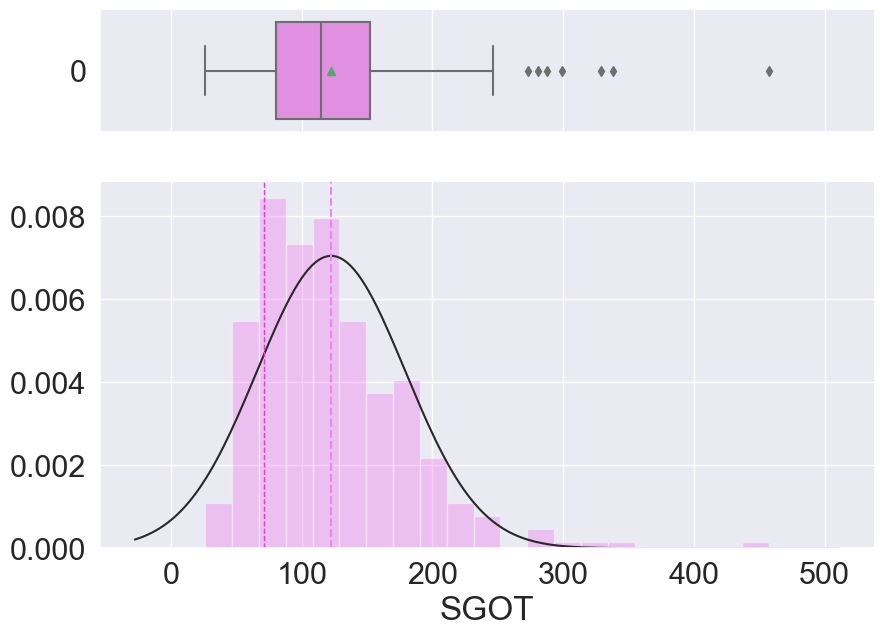

In [ ]:
boxplot_histogram(df.SGOT)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      418 non-null    float64
 1   Albumin        418 non-null    float64
 2   Copper         310 non-null    float64
 3   Alk_Phos       312 non-null    float64
 4   SGOT           312 non-null    float64
 5   Tryglicerides  282 non-null    float64
 6   Platelets      407 non-null    float64
 7   Prothrombin    416 non-null    float64
dtypes: float64(8)
memory usage: 26.3 KB


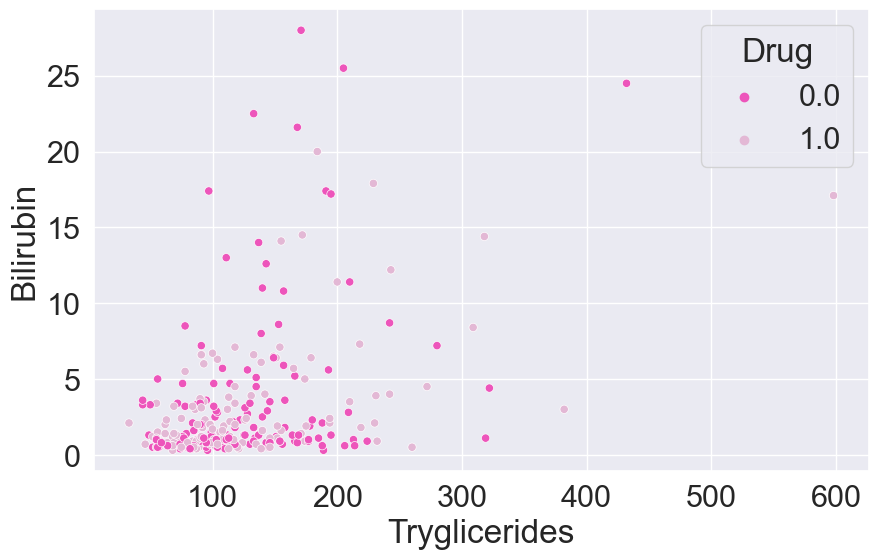

In [ ]:
palette = ["#ed55bb", "#e3b8d5"]
plt.figure(figsize=(10,6))
sns.scatterplot(y='Bilirubin', x='Prothrombin', hue='Drug', data=df, palette=palette);

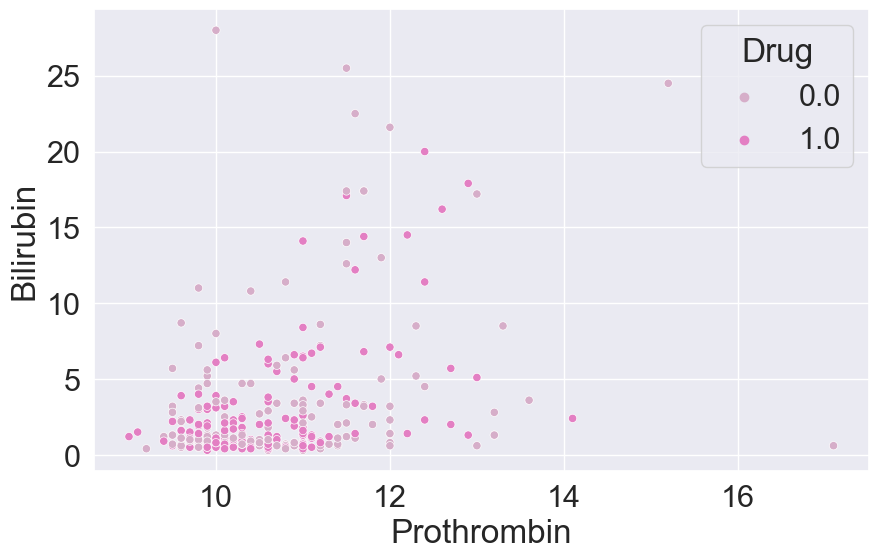

In [ ]:
palette2 = ["#d6aec9", "#e37fc3"]
plt.figure(figsize=(10,6))
sns.scatterplot(y='Bilirubin', x='Prothrombin', hue='Drug', data=df, palette=palette2);

## MACHINE LEARNING 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
# import scipy.stats as stats
# from scipy.stats import stats, norm, skew
# import statsmodels.api as sm

In [ ]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Drug           312 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        312 non-null    float64
 5   Hepatomegaly   312 non-null    float64
 6   Spiders        312 non-null    float64
 7   Edema          418 non-null    int64  
 8   Bilirubin      418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         310 non-null    float64
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  282 non-null    float64
 14  Platelets      407 non-null    float64
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(13), int64(4)
memory usage: 55.6 KB


In [ ]:
X = data.drop('N_Days',axis=1)    # Features
y = data['N_Days'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(292, 16) (126, 16)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

# 2 commonly used splitting criteria are Gini impurity and information gain (entropy)
# Gini: measures the probability of misclassifying a randomly chosen element if it were randomly labeled
    # Would goal be to minimize or maximize the Gini impurity when making splits???
        # MINIMIZE
    
    
# Information Gain (Entropy): entropy measures impurity or uncertainty, while information gain quantifies reduction in entropy
    # Which do we want to minimize? Maximize?
        # MINIMIZE Entropy
        # MAXIMIZE Information Gain

In [ ]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
make_confusion_matrix(model,y_test)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_train.value_counts(1)

N_Days
1191   0.01
597    0.01
1925   0.01
264    0.01
1690   0.01
       ... 
4523   0.00
939    0.00
1847   0.00
681    0.00
3244   0.00
Name: proportion, Length: 280, dtype: float64

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
get_recall_score(model)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
column_names = list(data.columns)
column_names.remove('N_Days')  # As this is the DV                
feature_names = column_names
print(feature_names)

ValueError: list.remove(x): x not in list

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# Code below will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

NameError: name 'feature_names' is not defined

<Figure size 2000x3000 with 0 Axes>

In [ ]:
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

NameError: name 'feature_names' is not defined

In [ ]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85}) 
# Random state = controls random shuffling and splitting
# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(15,27),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.0001,0.001,0.001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
get_recall_score(estimator)

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

NameError: name 'feature_names' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=False))

In [ ]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
comparison_frame_dtree = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with Grid SearchCV'], 'Train_Recall':[1,0.97], 'Test_Recall':[0.43, 0.89]}) 
comparison_frame_dtree

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.43
1,Decision tree with Grid SearchCV,0.97,0.89


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data_2=df

In [ ]:
X = data_2.drop('N_Days',axis=1)
y = data_2['N_Days'] 

KeyError: "['Outcome'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
print(X_train.shape, X_test.shape)

In [ ]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Scoring method used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the optimal combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm
dtree_estimator.fit(X_train, y_train)

In [ ]:
#  Function to calculate different metric scores - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [ ]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

In [ ]:
# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(rf_estimator)

# Create the confusion matrix
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

In [ ]:
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

In [ ]:
get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

NameError: name 'get_metrics_score' is not defined

In [ ]:
%%time 
# captures time it takes to run this block of code

# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
# Cross-validation = 
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

In [ ]:
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)

In [ ]:
get_metrics_score(bagging_tuned)

make_confusion_matrix(bagging_tuned,y_test)

In [ ]:
# Identify the models to compare
models = [d_tree, dtree_tuned,rf_estimator,rf_tuned, bagging_classifier,bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall and Precision)
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

NameError: name 'd_tree' is not defined

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned'], 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'dtree_tuned' is not defined